# Finding info in the wine data set

## Write up

I began by importing libraries I thought would be helpful, simple ones to handle the data.

What can I tell about the data:
    * Only white wine has a quality rating of 9 and it has the highest expected alcohol content
    * Alcohol content and quality is correlated at about 45%:
        * White wine: 0.44
        * Red wine: 0.48
    * Quality is increasing in expected alcohol content:
        * Quality 3 alcohol content: red = 9.95; white = 10.345
        * Quality 8 alcohol content: red = 12.09; white = 11.64
    * Sulphates and quality are fairly uncorrelated:
        * White wine:  0.05
        * Red wine:  0.25
    * Volatile acidity and quality are negatively correlated:
        * White wine: -0.19
        * Red wine: -0.39
        

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()
sns.set()

In [2]:
dfRed = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-red.csv', sep=';')
dfWhite = pd.read_csv('~/Git/ConvexOptimizationWithPython/Data/winequality-white.csv', sep=';')

In [3]:
dfRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dfWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dfRed['red'] = 1
dfWhite['red'] = 0
dfWine = pd.concat([dfRed,dfWhite])
dfWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


/Users/mbair/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mbair/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


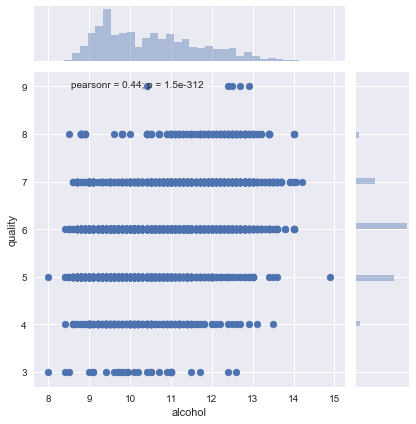

In [6]:
sns.jointplot(x = 'alcohol', y = 'quality', data = dfWine, kind = 'scatter')

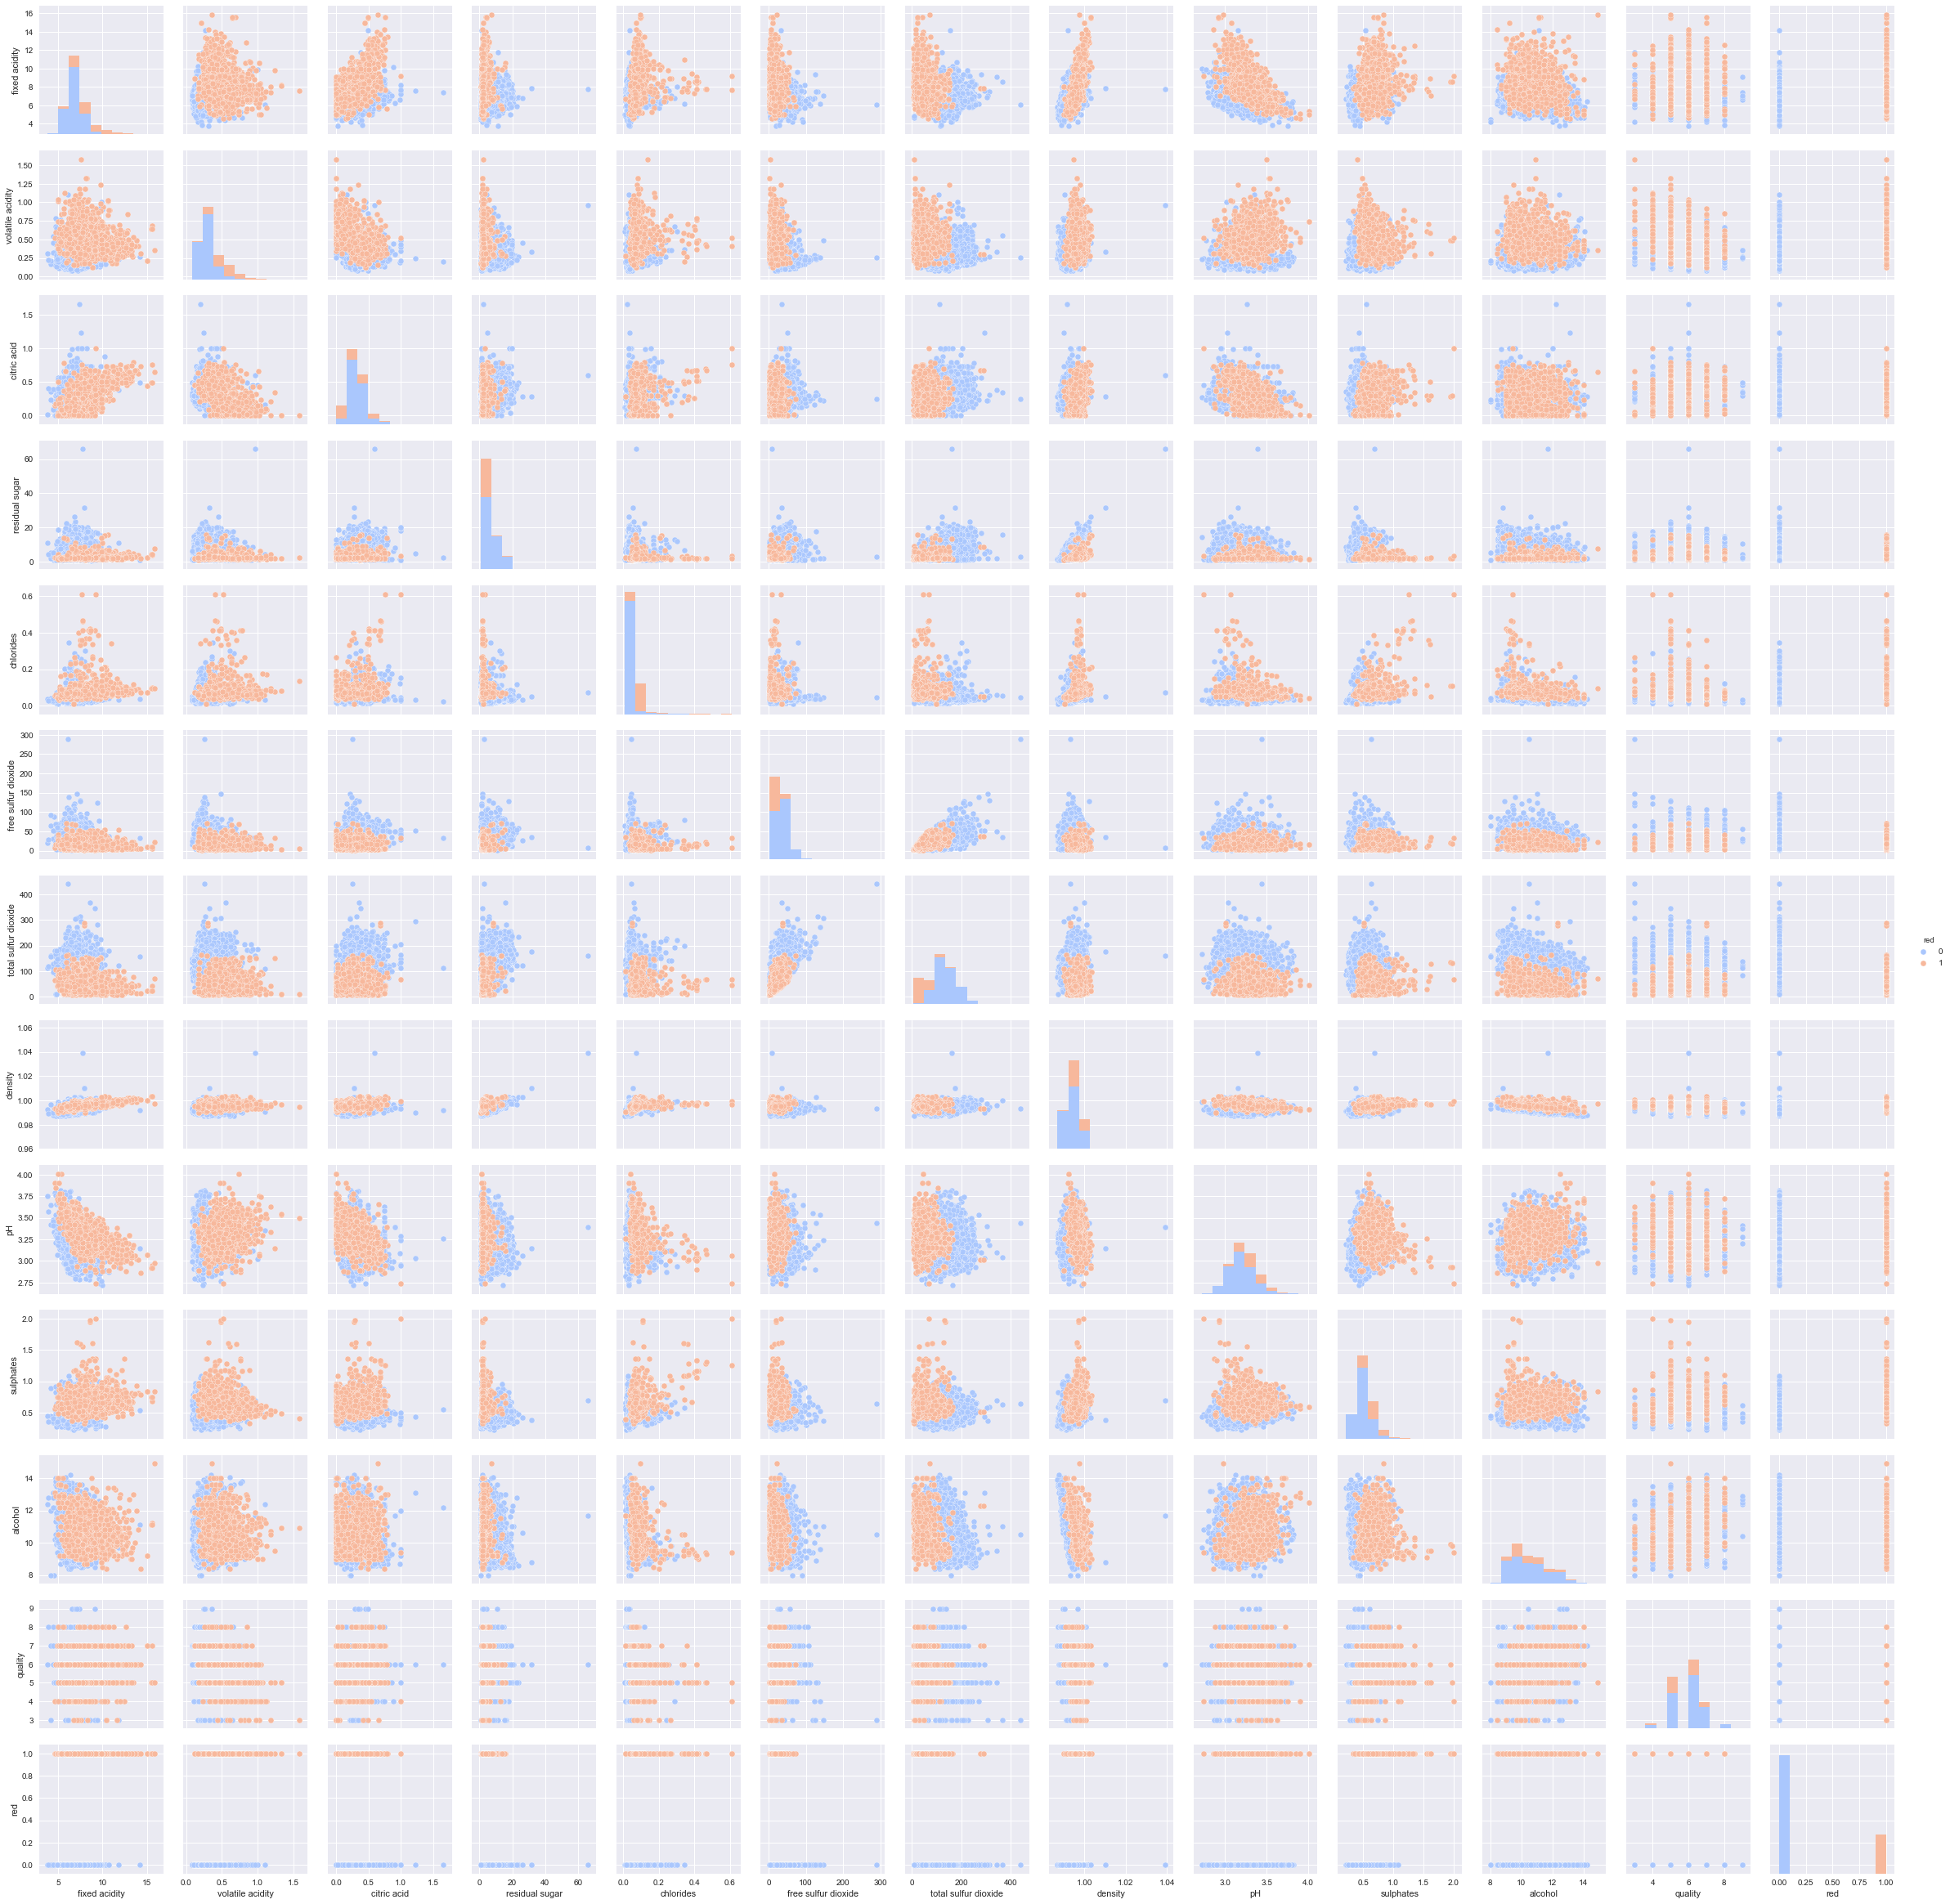

In [7]:
sns.pairplot(dfWine, hue = 'red', palette = 'coolwarm')

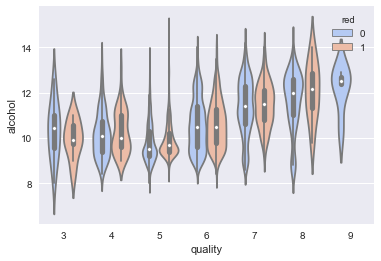

In [8]:
sns.violinplot(x = 'quality', y = 'alcohol', hue = 'red', data = dfWine, dodge = True, palette = 'coolwarm')

White is the only wine which has a quality rating of 9

The wine with a quality rating of 9 has an expected (average) alcohol content higher than any of the wine quality

In [9]:
rAlMean = dfWine['alcohol'][dfWine['red'] == 1].mean()
wAlMean = dfWine['alcohol'][dfWine['red'] == 0].mean()
print(wAlMean > rAlMean)

rAlVar = dfWine['alcohol'][dfWine['red'] == 1].var()
wAlVar = dfWine['alcohol'][dfWine['red'] == 0].var()
print(wAlVar > rAlVar)

rAlQualCor = dfWine['alcohol'][dfWine['red'] == 1].corr(dfWine['quality'][dfWine['red'] == 1])
wAlQualCor = dfWine['alcohol'][dfWine['red'] == 0].corr(dfWine['quality'][dfWine['red'] == 0])
print("Red wine's alcohol content is correlated with quality by", rAlQualCor)
print("White wine's alcohol content is correlated with quality by", wAlQualCor)
print()

wSulphCor = dfWine['sulphates'][dfWine['red'] == 0].corr(dfWine['quality'][dfWine['red'] == 0])
rSulphCor = dfWine['sulphates'][dfWine['red'] == 1].corr(dfWine['quality'][dfWine['red'] == 1])
print("Correlation of white wine and sulphates: ", wSulphCor)
print("Correlation of red wine and sulphates: ", rSulphCor)
print()

wVolCor = dfWine['volatile acidity'][dfWine['red'] == 0].corr(dfWine['quality'][dfWine['red'] == 0])
rVolCor = dfWine['volatile acidity'][dfWine['red'] == 1].corr(dfWine['quality'][dfWine['red'] == 1])
print("Correlation of white wine and volatile acidity: ", wVolCor)
print("Correlation of red wine and volatile acidity: ", rVolCor)

True
True
Red wine's alcohol content is correlated with quality by 0.4761663240011359
White wine's alcohol content is correlated with quality by 0.4355747154613728

Correlation of white wine and sulphates:  0.05367787713279205
Correlation of red wine and sulphates:  0.2513970790692613

Correlation of white wine and volatile acidity:  -0.19472296892113417
Correlation of red wine and volatile acidity:  -0.390557780264007


In [10]:
wSulphCor = dfWine['sulphates'][dfWine['red'] == 0].corr(dfWine['quality'][dfWine['red'] == 0])
rSulphCor = dfWine['sulphates'][dfWine['red'] == 1].corr(dfWine['quality'][dfWine['red'] == 1])
print("Correlation of white wine and sulphates: ", wSulphCor)
print("Correlation of red wine and sulphates: ", rSulphCor)

Correlation of white wine and sulphates:  0.05367787713279205
Correlation of red wine and sulphates:  0.2513970790692613


The expected alcohol content in white wine is higher than in red wine.

The variance of alcohol content in white wine is higher than in red.

The correlation of alcohol content and quality is lower in white than in red.

<Figure size 432x288 with 0 Axes>

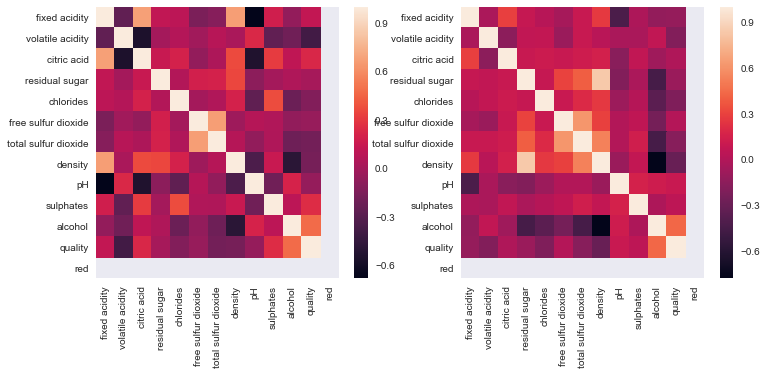

In [11]:
fig = plt.figure()
fig,axes = plt.subplots(ncols = 2, figsize = (12, 5))

sns.heatmap(dfWine[dfWine['red'] == 1].corr(), ax=axes[0])
sns.heatmap(dfWine[dfWine['red'] == 0].corr(), ax = axes[1])

In [12]:
dfWine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [13]:
dfWine.pivot_table(index = 'red').T

red,0,1
alcohol,10.514267,10.422983
chlorides,0.045772,0.087467
citric acid,0.334192,0.270976
density,0.994027,0.996747
fixed acidity,6.854788,8.319637
free sulfur dioxide,35.308085,15.874922
pH,3.188267,3.311113
quality,5.877909,5.636023
residual sugar,6.391415,2.538806
sulphates,0.489847,0.658149


In [14]:
byType = dfWine.pivot_table(index = 'quality', columns = 'red').T
byType

quality                            3           4           5           6  \
                     red                                                   
alcohol              0     10.345000   10.152454    9.808840   10.575372   
                     1      9.955000   10.265094    9.899706   10.629519   
chlorides            0      0.054300    0.050098    0.051546    0.045217   
                     1      0.122500    0.090679    0.092736    0.084956   
citric acid          0      0.336000    0.304233    0.337653    0.338025   
                     1      0.171000    0.174151    0.243686    0.273824   
density              0      0.994884    0.994277    0.995263    0.993961   
                     1      0.997464    0.996542    0.997104    0.996615   
fixed acidity        0      7.600000    7.129448    6.933974    6.837671   
                     1      8.360000    7.779245    8.167254    8.347179   
free sulfur dioxide  0     53.325000   23.358896   36.432052   35.650591   
                     1     11.000000   12.264151   16.983847   15.711599   
pH                   0      3.187500    3.182883    3.168833    3.188599   
                     1      3.398000    3.381509    3.304949    3.318072   
residual sugar       0      6.392500    4.628221    7.334969    6.441606   
                     1      2.635000    2.694340    2.528855    2.477194   
sulphates            0      0.474500    0.476135    0.482203    0.491106   
                     1      0.570000    0.596415    0.620969    0.675329   
total sulfur dioxide 0    170.600000  125.279141  150.904598  137.047316   
                     1     24.900000   36.245283   56.513950   40.869906   
volatile acidity     0      0.333250    0.381227    0.302011    0.260564   
                     1      0.884500    0.693962    0.577041    0.497484   

quality                            7           8          9  
                     red                                     
alcohol              0     11.367936   11.636000   12.18000  
                     1     11.465913   12.094444        NaN  
chlorides            0      0.038191    0.038314    0.02740  
                     1      0.076588    0.068444        NaN  
citric acid          0      0.325625    0.326514    0.38600  
                     1      0.375176    0.391111        NaN  
density              0      0.992452    0.992236    0.99146  
                     1      0.996104    0.995212        NaN  
fixed acidity        0      6.734716    6.657143    7.42000  
                     1      8.872362    8.566667        NaN  
free sulfur dioxide  0     34.125568   36.720000   33.40000  
                     1     14.045226   13.277778        NaN  
pH                   0      3.213898    3.218686    3.30800  
                     1      3.290754    3.267222        NaN  
residual sugar       0      5.186477    5.671429    4.12000  
                     1      2.720603    2.577778        NaN  
sulphates            0      0.503102    0.486229    0.46600  
                     1      0.741256    0.767778        NaN  
total sulfur dioxide 0    125.114773  126.165714  116.00000  
                     1     35.020101   33.444444        NaN  
volatile acidity     0      0.262767    0.277400    0.29800  
                     1      0.403920    0.423333        NaN

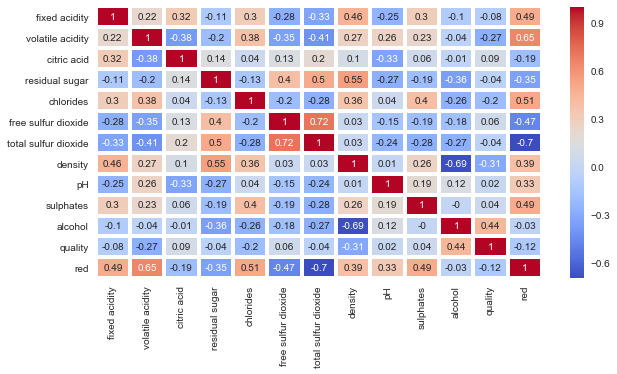

In [30]:
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(round(dfWine.corr(),2), cmap = 'coolwarm', linecolor = 'white', annot = True, linewidths = 3)

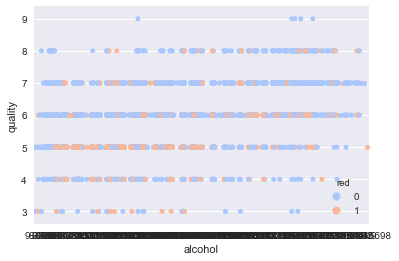

In [16]:
sns.swarmplot(x="alcohol", y="quality",hue='red',data=dfWine, palette="coolwarm")

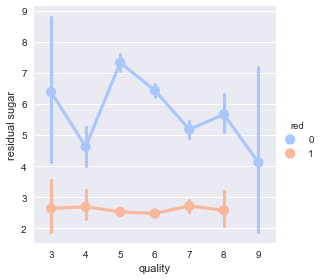

In [17]:
sns.factorplot(x="quality", y="residual sugar", hue='red', data=dfWine, palette="coolwarm")

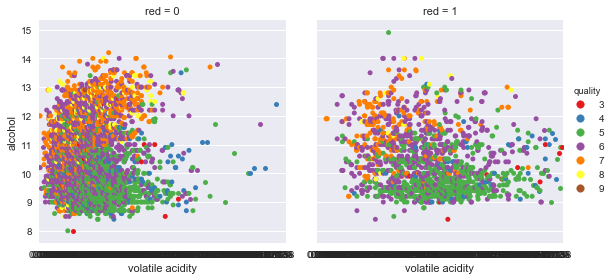

In [18]:
sns.factorplot(x="volatile acidity", y="alcohol", hue='quality', col ='red', data=dfWine, palette ='Set1', kind = 'swarm')

### Analysis

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn import svm

import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [20]:
trainX, testX, trainY, testY = train_test_split(dfWine['residual sugar'], dfWine['red'], test_size=0.2, shuffle=False, random_state=1)
 
# make a naive prediction
def naive_prediction(testX, value):
	return [value for x in range(len(testX))]
 
# evaluate skill of predicting each class value
for value in [0, 1]:
	# forecast
	yhat = naive_prediction(testX, value)
	# evaluate
	score = accuracy_score(testY, yhat)
	# summarize
	print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=1.000
Naive=1 score=0.000


In [21]:
trainX, testX, trainY, testY = train_test_split(dfWine['residual sugar'], dfWine['red'], test_size=0.2, random_state=123, stratify = dfWine['red'])

for value in [0, 1]:
	# forecast
	yhat = naive_prediction(testX, value)
	# evaluate
	score = accuracy_score(testY, yhat)
	# summarize
	print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=0.754
Naive=1 score=0.246


In [22]:
trainX, testX, trainY, testY = train_test_split(dfWine['sulphates'], dfWine['red'], test_size=0.2, random_state=123, stratify = dfWine['red'])

for value in [0, 1]:
	# forecast
	yhat = naive_prediction(testX, value)
	# evaluate
	score = accuracy_score(testY, yhat)
	# summarize
	print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=0.754
Naive=1 score=0.246


#### Logistic Regression

In [23]:
trainX, testX, trainY, testY = train_test_split(dfWine['residual sugar'], dfWine['red'], test_size=0.2, random_state=123, stratify = dfWine['red'])
trainX = np.array(trainX).reshape(-1, 1)
logistic = LogisticRegression(C=1)
logFit = logistic.fit(trainX, trainY)
logFit.score(trainX, trainY)

0.7538964787377334

In [24]:
trainX, testX, trainY, testY = train_test_split(dfWine['sulphates'], dfWine['red'], test_size=0.2, random_state=123, stratify = dfWine['red'])
trainX = np.array(trainX).reshape(-1, 1)
logistic = LogisticRegression(C=1)
logFit = logistic.fit(trainX, trainY)
logFit.score(trainX, trainY)

0.7877621704829709

#### PCA

In [ ]:
# pca and visualize along two principal components
pca = PCA(n_components = 7)
trans_pd = pd.DataFrame(pca.fit_transform(train_features))
transformed = pca.fit_transform(train_features)
# logistic regression
classifier1 = linear_model.LogisticRegression()
# fit logistic regression using first 2 principal components
classifier1.fit(transformed, train_labels)

pyplot.scatter(transformed_pd[train_labels==0][0], transformed_pd[train_labels==0][1], label='Class 1', c='blue', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==1][0], transformed_pd[train_labels==1][1], label='Class 2', c='lightgrey', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==2][0], transformed_pd[train_labels==2][1], label='Class 3', c='red', edgecolors = 'k')

pyplot.legend()
pyplot.show()

Correlation of white wine and sulphates:  0.05367787713279205
Correlation of red wine and sulphates:  0.2513970790692613
